In [2]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [11]:
U0 = 2.5 ##V
e = 4.8 * 10 ** (-10) ##electron charge SGS
m = 9.1094 * 10 ** (-28) ##electron mass gr
h_ = 1.0546 * 10 ** (-27) ##h/2pi SGS
h = 6.6261 * 10 ** (-27) ##h erg * s
U1 = 2
U2 = 6
U_pr = 13 # bulshit number
##2 В/Дел????
Gu = 0.5

def l(U, n) :
    return n * np.pi * h_ * (2 * m * e * (U0 + U) / 300) ** (-0.5)
def Gl(U, l, Gu_) :
    return l / 2 * Gu_ / (U0 + U)
l1 = l(U1, 1)
l3 = 5 ** (0.5) * h * (32 * m * e * (U2 - U1) / 300) ** (-0.5)
Gl3 = l3 / 2 * Gu * 2 ** (0.5) / (U2 - U1)
U0_exp = (4./5 * U2 - 9./5 * U1) * e / (300 * 1.6 * 10 ** (-12))
GU0_exp = U0_exp * Gu * (16./25 + 81./25) ** (0.5) / (4./5 * U2 - 9./5 * U1)
Ei = U_pr * e / (300 * 1.6 * 10 ** (-12))
GEi = Gu / U_pr * Ei

print(l1, "+-", Gl(U1, l1, Gu), "sm")
print(l3, "+-", Gl3, "sm")
print("Table: ", 108 * 10 ** (-10), "sm")
print("U0_exp = ", U0_exp, "+-", GU0_exp , "eV")
print("Ei = ", Ei, "+-", GEi, "eV")

2.892754030142102e-08 +- 1.6070855723011679e-09 sm
3.430308074378653e-08 +- 3.031992626190142e-09 sm
Table:  1.08e-08 sm
U0_exp =  1.2000000000000006 +- 0.9848857801796106 eV
Ei =  13.0 +- 0.5 eV


In [6]:
Vc = np.array([.12, .22, .37, .48, .54, .68, .74, .83, .96, 1.1, 1.22, 1.33, 1.49, 1.66, 1.78, 1.96, 
              2.01, 2.30, 2.58, 2.8, 3.06, 3.33, 3.66, 3.98, 4.20, 4.53, 4.95, 5.3, 5.93, 6.26, 6.69, 
              7.03, 7.36, 7.62, 7.96, 8.34, 8.66, 8.87, 9.08, 9.42, 9.7, 10.0,
               10.5, 10.8, 11.1, 11.57], dtype = 'float') # V
Va = np.array([0.08, .08, 0.09, 0.12, 0.17, 0.56, 1.03, 2.6, 9.4, 24.7, 45.1, 68.1, 105.1, 139.7, 157.1,
              164.8, 162.4, 145.5, 122.6, 107.0, 96.1, 82.7, 68.8, 61.5, 56.8, 51.8, 45.8, 42.2, 39.4,
              39.1, 39.4, 39.9, 39.4, 40.3, 41.5, 42.3, 44.4, 46.1, 49.4, 52.1, 57.4, 66.3,
               71.0, 73.1, 79.7, 91.5], dtype = 'float')
Va = Va / 1000 # V
Ia = Va / (100 * 10 ** 3) # A
Ia = Ia * 10 ** 6 # mkA

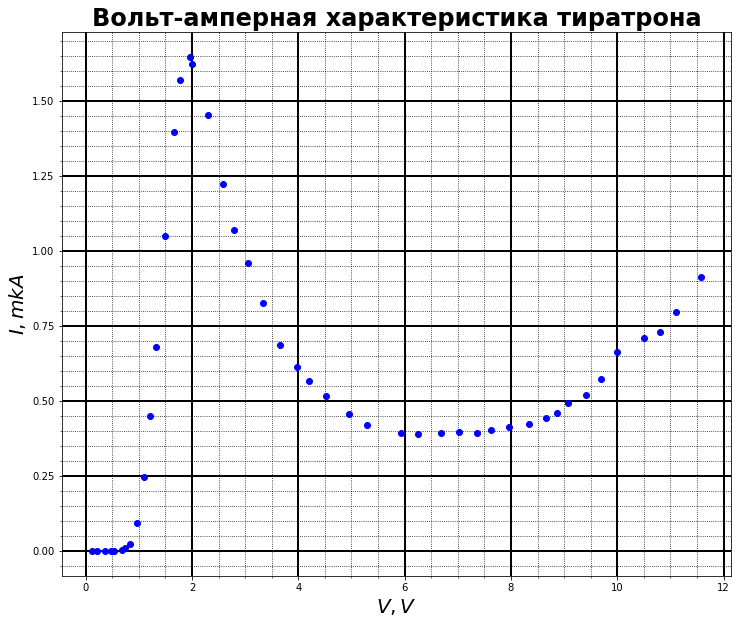

In [7]:
plt.plot(Vc, Ia, "bo")
plt.title("Вольт-амперная характеристика тиратрона", fontsize = 24, fontweight = 'bold')
fig = plt.gcf()
fig.set_size_inches(12, 10)
ax = plt.gca()
ax.set_ylabel(r'$I, mkA$', fontsize = 20)
ax.set_xlabel(r'$V, V$', fontsize = 20)
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 2)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

In [8]:
V1 = 2
GV1 = .25
V2 = 7
GV2 = .25
Us_pr = 13

l1_s = l(V1, 1)
Gl1_s = Gl(V1, l1_s, GV1)
l3_s = 5 ** (0.5) * h * (32 * m * e * (V2 - V1) / 300) ** (-0.5)
Gl3_s = l3 / 2 * (GV1 ** 2 + GV2 ** 2) ** (0.5) / (V2 - V1)
U0s_exp = (4./5 * V2 - 9./5 * V1) * e / (300 * 1.6 * 10 ** (-12))
GU0s_exp = U0s_exp * (16./25 * GV2 ** 2 + 81./25 * GV1 ** 2) ** (0.5) / (4./5 * V2 - 9./5 * V1)
Ei_s = Us_pr * e / (300 * 1.6 * 10 ** (-12))
GEi_s = GV2 / Us_pr * Ei

def V_max(n, l) :
    return ((n * np.pi * h_ / l) ** 2 / (2 * m)) / e * 300 - U0
def GV_max(V_max, l, Gl) :
    return 2 * Gl / l * V_max
Vmax2 = V_max(2, l1_s)
Vmax3 = V_max(3, l1_s)
GVmax2 = GV_max(Vmax2, l1_s, Gl1_s)
GVmax3 = GV_max(Vmax3, l1_s, Gl1_s)
print(l1_s, "+-", Gl1_s, "sm")
print(l3_s, "+-", Gl3_s, "sm")
print("U0_exp = ", U0s_exp, "+-", GU0s_exp , "eV")
print("Ei = ", Ei_s, "+-", GEi_s, "eV")
print("V_max2 = ", Vmax2, "+-", GVmax2, "V")
print("V_max3 = ", Vmax3, "+-", GVmax3, "V")

2.892754030142102e-08 +- 8.035427861505839e-10 sm
3.0681608152308294e-08 +- 1.2127970504760568e-09 sm
U0_exp =  2.0000000000000004 +- 0.49244289008980524 eV
Ei =  13.0 +- 0.25 eV
V_max2 =  15.5 +- 0.8611111111111112 V
V_max3 =  38.000000000000014 +- 2.111111111111112 V


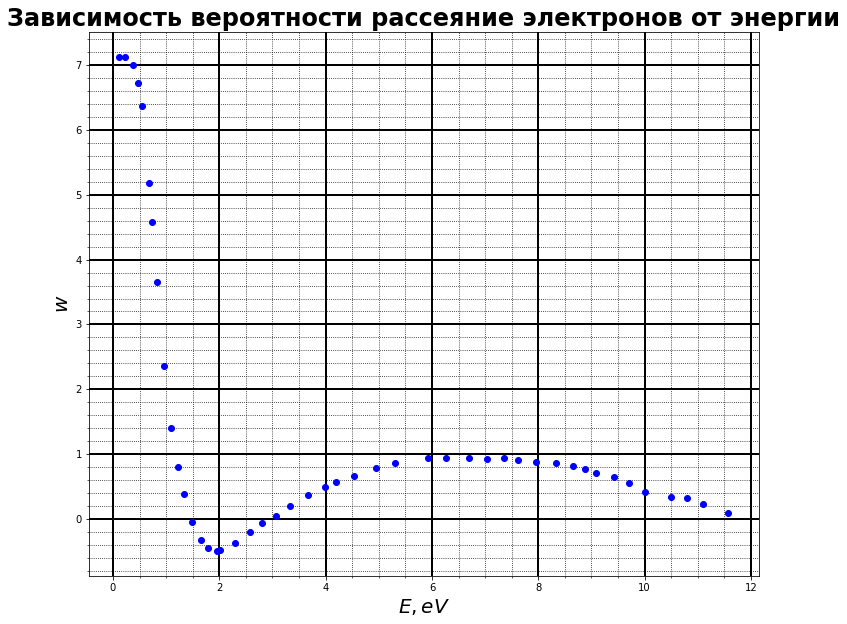

In [9]:
plt.plot(Vc, -np.log(Ia), "bo")
plt.title("Зависимость вероятности рассеяние электронов от энергии", fontsize = 24, fontweight = 'bold')
fig = plt.gcf()
fig.set_size_inches(12, 10)
ax = plt.gca()
ax.set_ylabel(r'$w$', fontsize = 20)
ax.set_xlabel(r'$E, eV$', fontsize = 20)
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 2)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')